**STEP 1**: The installation, importation and upgrade of the needed libraries. This is important as there would be no code without these.

In [1]:
!pip install yfinance pandas numpy matplotlib

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**STEP 2**: The creation of an interface that allows for the input of the ticker symbol of the stock, start date of data collection and end date of data collection. The interface should address the ease of changeability

In [21]:
ticker = "NVDA"
start_date = "2024-01-01"
end_date = "2024-11-22"

data = yf.download(ticker, start=start_date, end=end_date)
print(data)

[*********************100%***********************]  1 of 1 completed

Price                       Adj Close       Close        High         Low  \
Ticker                           NVDA        NVDA        NVDA        NVDA   
Date                                                                        
2024-01-02 00:00:00+00:00   48.157665   48.167999   49.294998   47.595001   
2024-01-03 00:00:00+00:00   47.558792   47.569000   48.183998   47.320000   
2024-01-04 00:00:00+00:00   47.987705   47.998001   48.500000   47.507999   
2024-01-05 00:00:00+00:00   49.086464   49.097000   49.547001   48.306000   
2024-01-08 00:00:00+00:00   52.241787   52.252998   52.275002   49.479000   
...                               ...         ...         ...         ...   
2024-11-15 00:00:00+00:00  141.979996  141.979996  145.240005  140.080002   
2024-11-18 00:00:00+00:00  140.149994  140.149994  141.550003  137.149994   
2024-11-19 00:00:00+00:00  147.009995  147.009995  147.130005  140.990005   
2024-11-20 00:00:00+00:00  145.889999  145.889999  147.559998  142.729996   

**STEP 3**: Dropping of the columns that are not needed in the first equity data and the second equity data for this project. The needed columns for this project are DATE, CLOSE and VOLUME

In [22]:
data = data.drop(columns=['Adj Close','Open','High','Low'])
print(data)

Price                           Close     Volume
Ticker                           NVDA       NVDA
Date                                            
2024-01-02 00:00:00+00:00   48.167999  411254000
2024-01-03 00:00:00+00:00   47.569000  320896000
2024-01-04 00:00:00+00:00   47.998001  306535000
2024-01-05 00:00:00+00:00   49.097000  415039000
2024-01-08 00:00:00+00:00   52.252998  642510000
...                               ...        ...
2024-11-15 00:00:00+00:00  141.979996  250132900
2024-11-18 00:00:00+00:00  140.149994  221866000
2024-11-19 00:00:00+00:00  147.009995  227834900
2024-11-20 00:00:00+00:00  145.889999  309871700
2024-11-21 00:00:00+00:00  146.669998  400946600

[226 rows x 2 columns]


**STEP 4**: Conversion of the collected data into a dataframe. There are several reasons for this step. One being its importance in data preprocessing. Another being its importance in handling diverse data (float, integer, strings etc). It is a flexibe structure for this purpose. Also, it is also needed in handling missing data.

In [23]:
df = pd.DataFrame(data)
print(df)

Price                           Close     Volume
Ticker                           NVDA       NVDA
Date                                            
2024-01-02 00:00:00+00:00   48.167999  411254000
2024-01-03 00:00:00+00:00   47.569000  320896000
2024-01-04 00:00:00+00:00   47.998001  306535000
2024-01-05 00:00:00+00:00   49.097000  415039000
2024-01-08 00:00:00+00:00   52.252998  642510000
...                               ...        ...
2024-11-15 00:00:00+00:00  141.979996  250132900
2024-11-18 00:00:00+00:00  140.149994  221866000
2024-11-19 00:00:00+00:00  147.009995  227834900
2024-11-20 00:00:00+00:00  145.889999  309871700
2024-11-21 00:00:00+00:00  146.669998  400946600

[226 rows x 2 columns]


**STEP 5**: Computation of the Volume Weighted Average Price

In [24]:
df['price_volume'] = df['Close'] * df['Volume']
df['cumulative_price_volume'] = df['price_volume'].cumsum()
df['cumulative_volume'] = df['Volume'].cumsum()

vwap = df['cumulative_price_volume'] / df['cumulative_volume']

print("VWAP for each period:")
print(vwap)

VWAP for each period:
Date
2024-01-02 00:00:00+00:00    48.167999
2024-01-03 00:00:00+00:00    47.905462
2024-01-04 00:00:00+00:00    47.932772
2024-01-05 00:00:00+00:00    48.265160
2024-01-08 00:00:00+00:00    49.487460
                               ...    
2024-11-15 00:00:00+00:00    97.626948
2024-11-18 00:00:00+00:00    97.733038
2024-11-19 00:00:00+00:00    97.858963
2024-11-20 00:00:00+00:00    98.025321
2024-11-21 00:00:00+00:00    98.242352
Length: 226, dtype: float64


**STEP 6**: Plotting of the chart

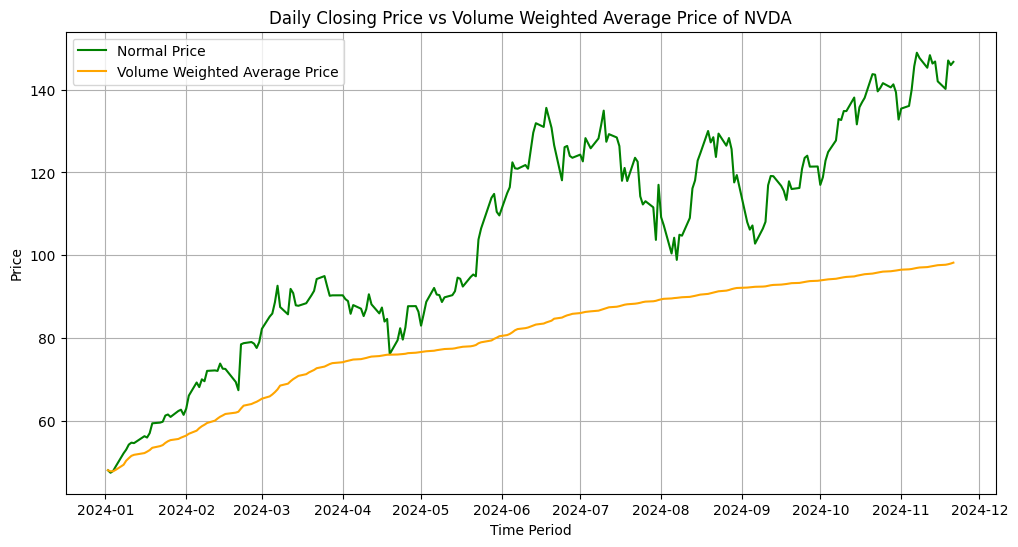

In [25]:
plt.figure(figsize=(12,6))

plt.plot(df['Close'], label='Normal Price', color='green', linestyle='-')
plt.plot(vwap, label='Volume Weighted Average Price', color='orange', linestyle='-')
plt.xlabel('Time Period')
plt.ylabel('Price')
plt.title(f"Daily Closing Price vs Volume Weighted Average Price of {ticker}")
plt.legend()
plt.grid(True)
plt.show()